In [3]:
import cv2
from matplotlib import pyplot as plot
image_file="image.jpeg"
img=cv2.imread(image_file)

In [ ]:
cv2.imshow("orginal image",img)
cv2.waitKey(0)

In [4]:
def display(im_path):
    dpi=80
    im_data=plot.imread(im_path)
    height,width,depth  =im_data.shape
    #depth a ajouter si on change le format de l'image
    figsize=width/ float(dpi),height/ float(dpi)
    #
    fig=plot.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    #
    ax.axis('off')
    #
    ax.imshow(im_data,cmap='gray')
    plot.show()

In [5]:
# im_path="image.jpeg"
# im_data=plot.imread(im_path)

In [6]:
# im_data.shape

(720, 1280, 4)

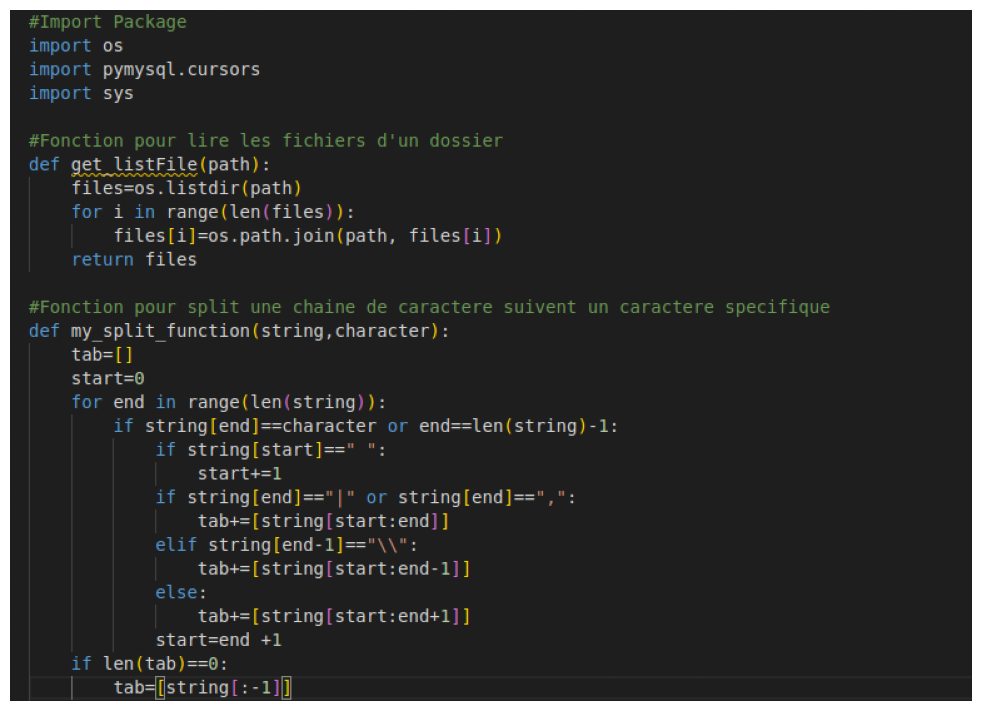

In [5]:
display("./image.jpeg")

In [6]:
inverted_image=cv2.bitwise_not(img)
cv2.imwrite("inverted.jpg",inverted_image)


True

In [7]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [8]:

gray_image=grayscale(img)
cv2.imwrite("gray.jpg",gray_image)

True

In [9]:
def display(im_path):
    dpi=80
    im_data=plot.imread(im_path)
    height,width  =im_data.shape
    #depth a ajouter si on change le format de l'image
    figsize=width/ float(dpi),height/ float(dpi)
    #
    fig=plot.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    #
    ax.axis('off')
    #
    ax.imshow(im_data,cmap='gray')
    plot.show()

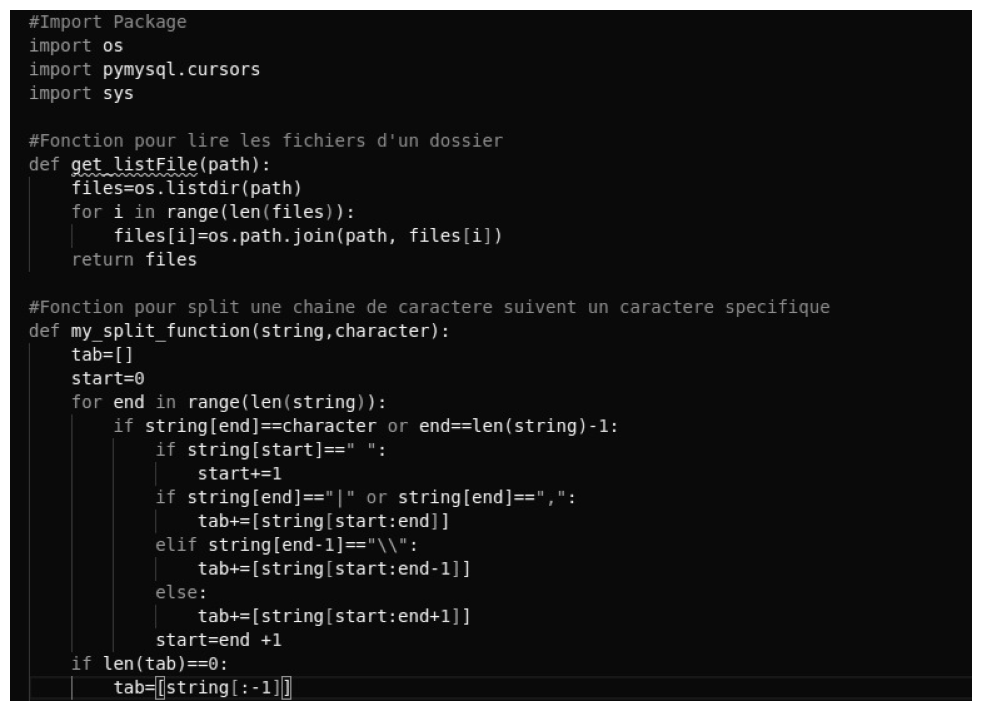

In [10]:
display("gray.jpg")

In [147]:
thresh,im_bw=cv2.threshold(gray_image,30,50,cv2.THRESH_BINARY)
cv2.imwrite("./bw_image.jpg",im_bw)

True

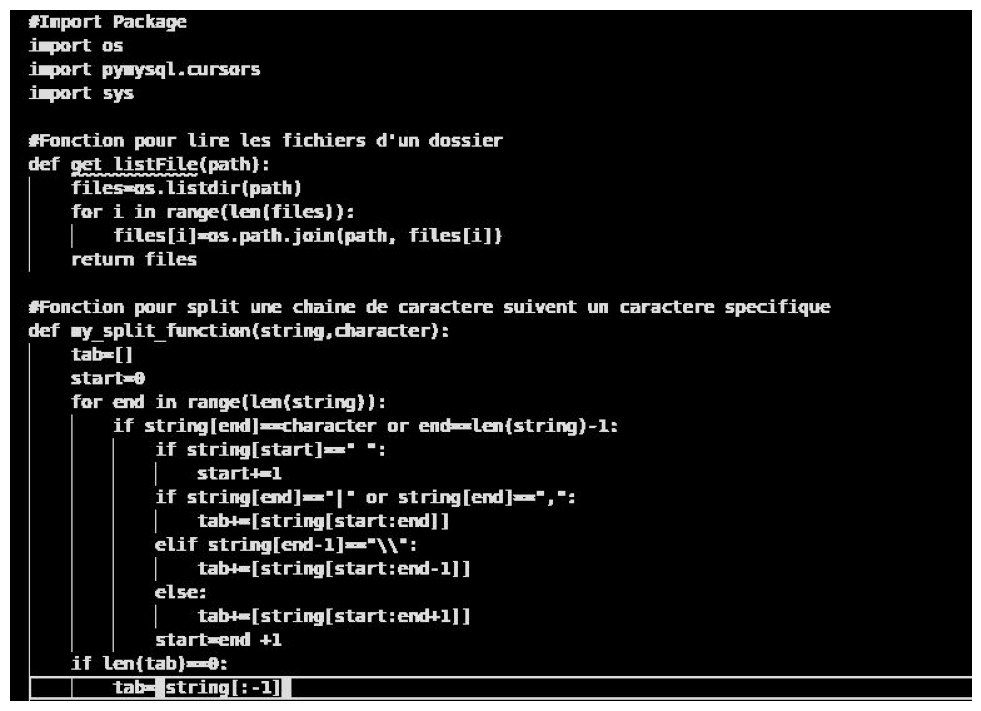

In [148]:
display("./bw_image.jpg")

In [149]:
def noise_removal(image):
    import numpy as np
    kernel=np.ones((1,1),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return (image)

In [150]:
no_noise=noise_removal(gray_image)
cv2.imwrite("./no_noise.jpg",no_noise)

True

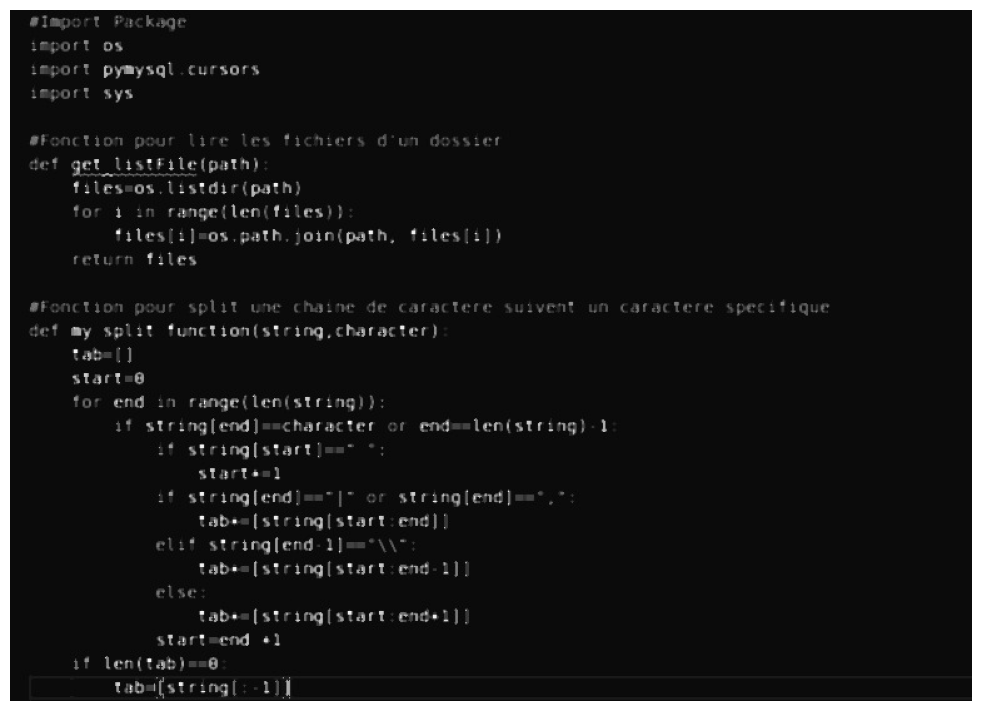

In [151]:
display("./no_noise.jpg")

In [121]:
def thin_font(image):
    import numpy as np
    image=cv2.bitwise_not(image)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1 )
    image=cv2.bitwise_not(image)
    return(image)



In [122]:
eroded_image=thin_font(no_noise)
cv2.imwrite("./eroded_image.jpg",eroded_image)

True

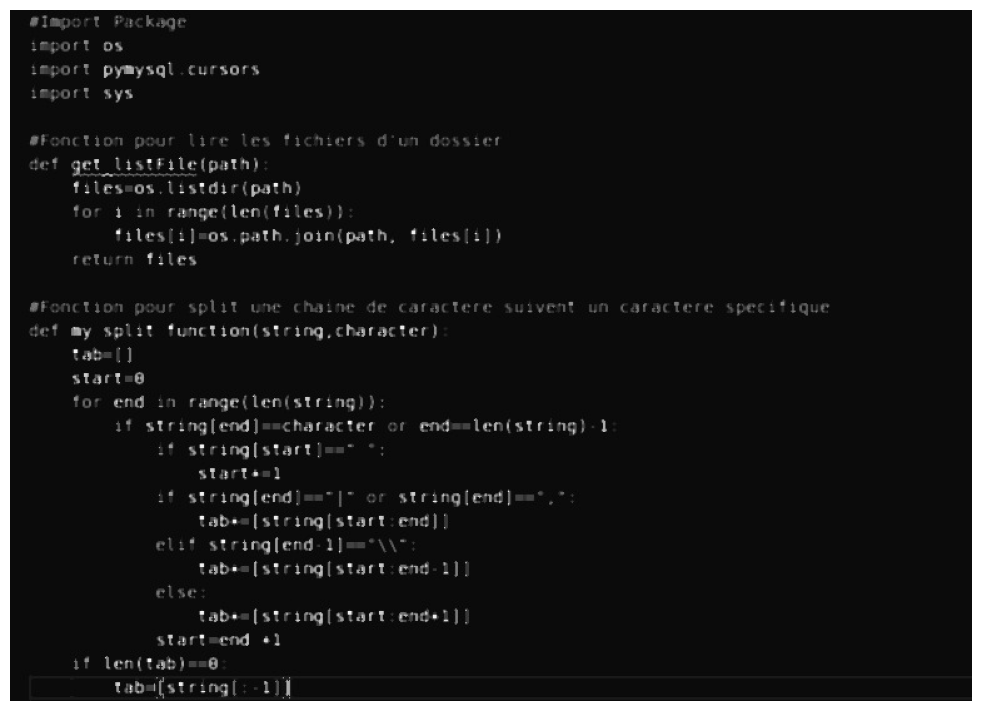

In [123]:
display("eroded_image.jpg")

In [110]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)


In [111]:
dilated_image=thick_font(eroded_image)
cv2.imwrite("./dilated_image.jpg",dilated_image)

True

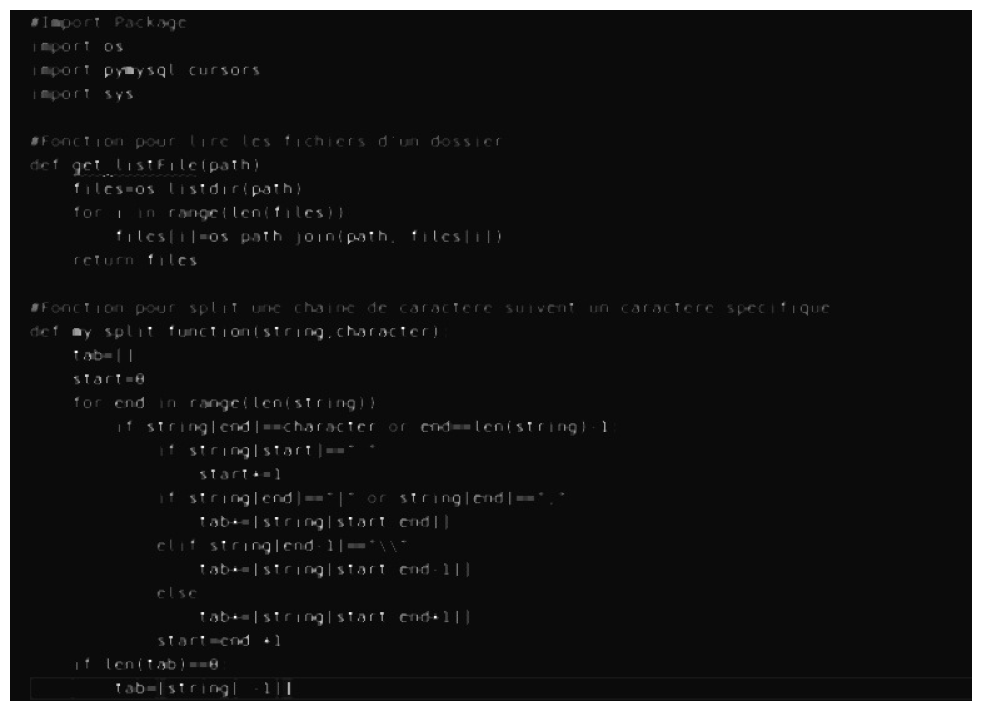

In [112]:
display("./dilated_image.jpg")